# Discovering Frequent Patterns in Big Data Using ECLATbitset Algorithm

In this tutorial, we will discuss the first approach to find frequent patterns in big data using ECLATbitset algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing ECLATbitset on a single dataset at a particular minimum support value</a>

#### Step 0: install pami repository

In [ ]:
!pip install -U pami

#### Step 1: Import the ECLATbitset algorithm

In [ ]:
from PAMI.frequentPattern.basic import ECLATbitset  as alg

#### Step 2: Specify the following input parameters

In [ ]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'

#### Step 3: Execute the ECLATbitset algorithm

In [ ]:
obj = alg.ECLATbitset(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Frequent patterns were generated successfully using Eclat_bitset algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [ ]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [ ]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [ ]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 27532


##### Step 5.2: Runtime consumed by the mining algorithm

In [ ]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 1398.162481546402


##### Step 5.3: Total Memory consumed by the mining algorithm

In [ ]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 229834752
Memory (USS): 191168512


# Advanced Tutorial on Implementing ECLATbitset Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using ECLATbitset algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the ECLATbitset algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the ECLATbitset algorithm and pandas data frame

In [ ]:
from PAMI.frequentPattern.basic import ECLATbitset  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [ ]:
inputFile = 'transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of ECLATbitset algorithm

#### Step 3: Execute the ECLATbitset algorithm using a for loop

In [ ]:
algorithm = 'ECLATbitset'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.ECLATbitset('transactional_T10I4D100K.csv', minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using Eclat_bitset algorithm
Frequent patterns were generated successfully using Eclat_bitset algorithm
Frequent patterns were generated successfully using Eclat_bitset algorithm
Frequent patterns were generated successfully using Eclat_bitset algorithm
Frequent patterns were generated successfully using Eclat_bitset algorithm


In [ ]:
print(result)

     algorithm  minSup  patterns      runtime     memory
0  ECLATbitset     100     27532  1019.680960  230670336
1  ECLATbitset     150     19126   663.871636  229101568
2  ECLATbitset     200     13255   436.363724  228560896
3  ECLATbitset     250      7703   252.914996  227254272
4  ECLATbitset     300      4552   154.023898  226435072


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [ ]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

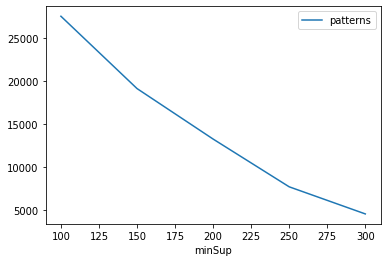

Graph for No Of Patterns is successfully generated!


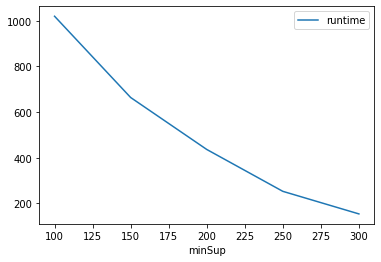

Graph for Runtime taken is successfully generated!


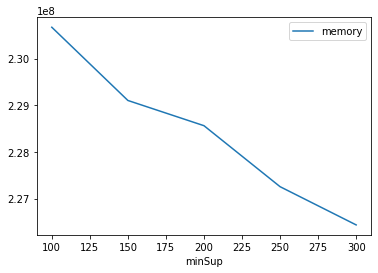

Graph for memory consumption is successfully generated!


In [ ]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [ ]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
